# Import libraries

In [24]:
import pandas as pd
import requests 
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pycountry

# Get the data

In [7]:
url = 'https://api.census.gov/data/timeseries/idb/1year?get=NAME,AGE,POP,AREA_KM2&GENC=NO&YR=2021&SEX=0'
re = requests.get(url).content
re = json.loads(re)
print(re[0])

['NAME', 'AGE', 'POP', 'AREA_KM2', 'GENC', 'YR', 'SEX']


# Create Dataframe

In [10]:
df1 = pd.DataFrame(re, columns= re[0])
print(df1)


       NAME  AGE    POP  AREA_KM2  GENC    YR  SEX
0      NAME  AGE    POP  AREA_KM2  GENC    YR  SEX
1    Norway    0  66575    304282    NO  2021    0
2    Norway    1  66697    304282    NO  2021    0
3    Norway    2  66709    304282    NO  2021    0
4    Norway    3  66605    304282    NO  2021    0
..      ...  ...    ...       ...   ...   ...  ...
97   Norway   96   2547    304282    NO  2021    0
98   Norway   97   1913    304282    NO  2021    0
99   Norway   98   1362    304282    NO  2021    0
100  Norway   99    937    304282    NO  2021    0
101  Norway  100   1574    304282    NO  2021    0

[102 rows x 7 columns]


# Drop one row

In [13]:
df2 = df1.drop(index=[0])
print(df2)

       NAME  AGE    POP AREA_KM2 GENC    YR SEX
1    Norway    0  66575   304282   NO  2021   0
2    Norway    1  66697   304282   NO  2021   0
3    Norway    2  66709   304282   NO  2021   0
4    Norway    3  66605   304282   NO  2021   0
5    Norway    4  66411   304282   NO  2021   0
..      ...  ...    ...      ...  ...   ...  ..
97   Norway   96   2547   304282   NO  2021   0
98   Norway   97   1913   304282   NO  2021   0
99   Norway   98   1362   304282   NO  2021   0
100  Norway   99    937   304282   NO  2021   0
101  Norway  100   1574   304282   NO  2021   0

[101 rows x 7 columns]


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 1 to 101
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   NAME      101 non-null    object
 1   AGE       101 non-null    object
 2   POP       101 non-null    object
 3   AREA_KM2  101 non-null    object
 4   GENC      101 non-null    object
 5   YR        101 non-null    object
 6   SEX       101 non-null    object
dtypes: object(7)
memory usage: 5.7+ KB


# Convert some columns

In [16]:
def year(x):
    return 2021 - int(x)


df3 = pd.DataFrame(columns=['Year', 'Population'])
df3['Year'] = df2['AGE'].apply(year)
df3['Population'] = df2['POP'].apply(lambda x: int(x))
df3.head()

,Year,Population
1,2021,66575
2,2020,66697
3,2019,66709
4,2018,66605
5,2017,66411


 # Plot the dataframe

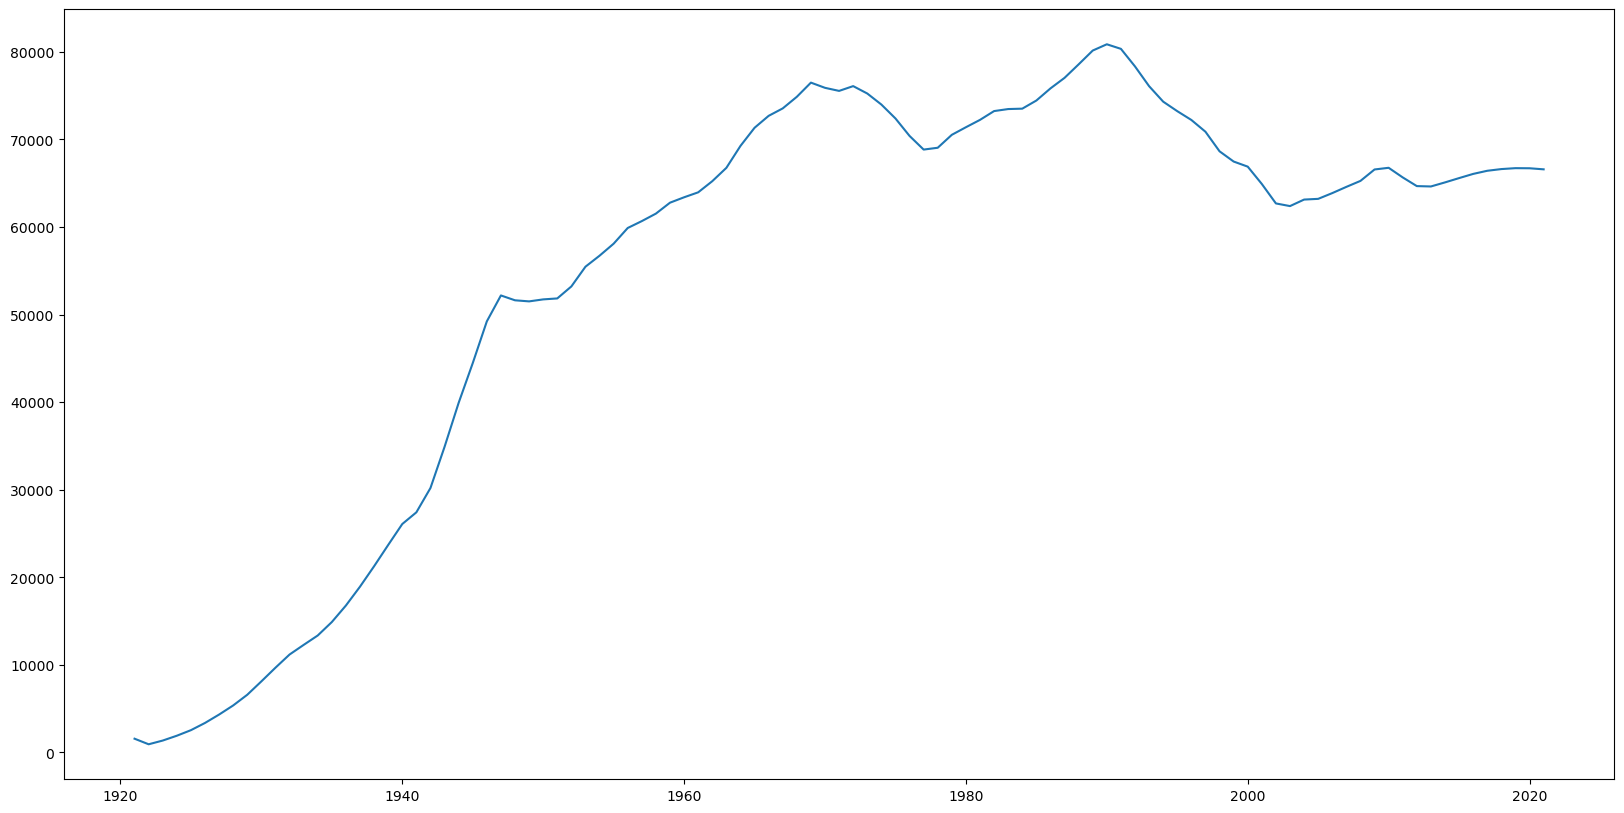

NameError: name 'st' is not defined

In [27]:
plt.figure(figsize=(20,10))
plt.plot(df3['Year'], df3['Population'])
plt.show()
st.pyplot(plt)

C:\Users\Joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


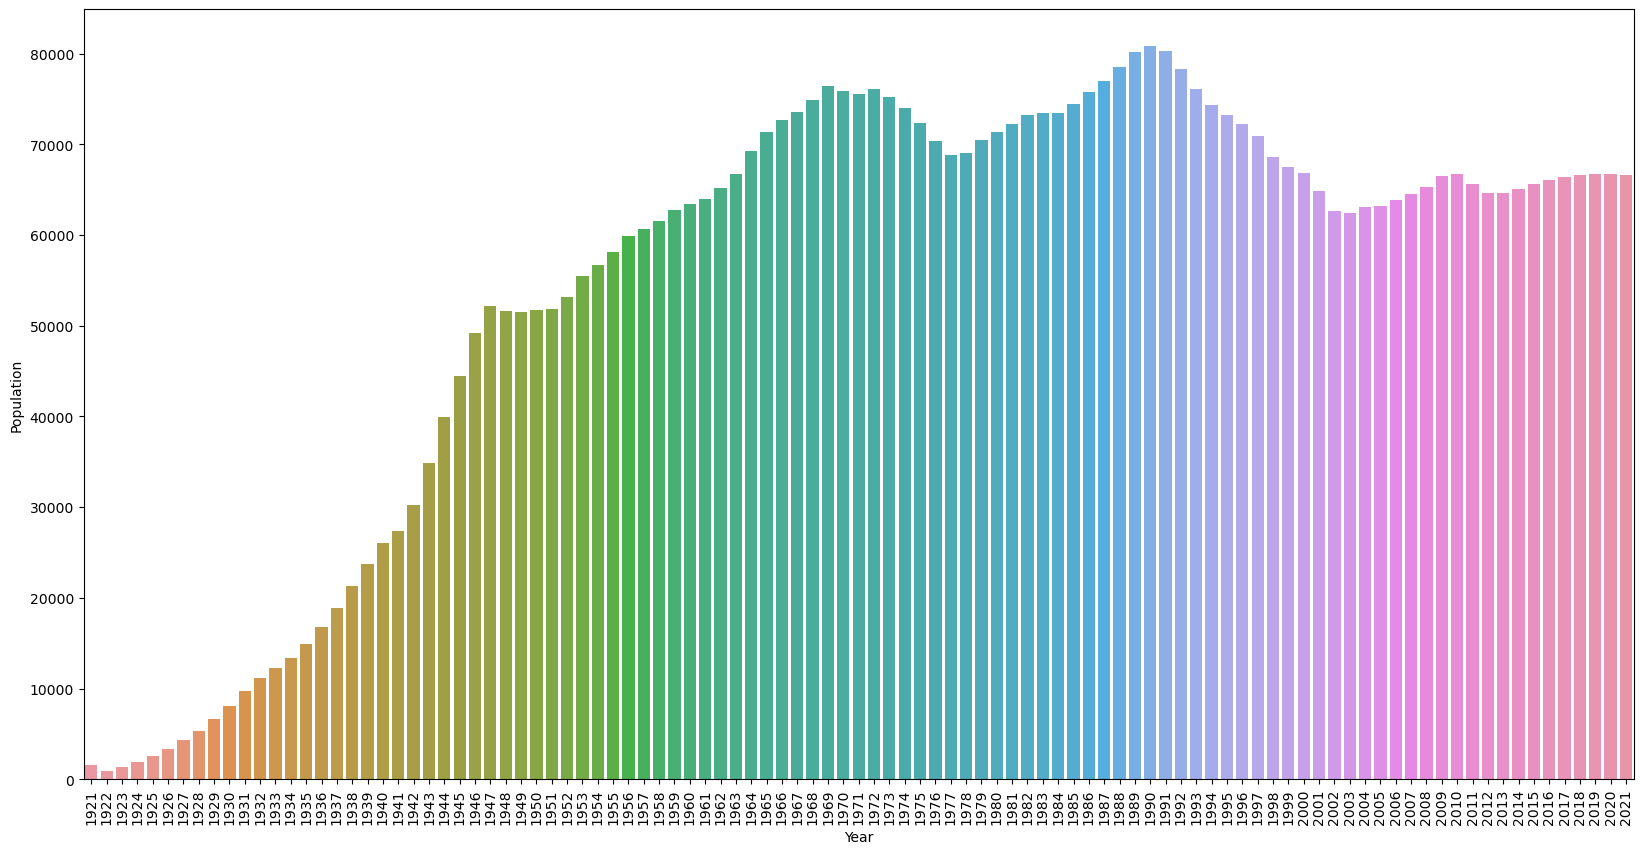

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(df3['Year'], df3['Population'])
plt.xticks(rotation=90)
plt.show()